**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

**LINK WEBPAGE**

https://nabila-e-k-011-p0m1.herokuapp.com

# I. Perkenalan

### Milestones 1

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Project tugas ini bertujuan untuk mendalami lebih lanjut dasar-dasar data science khususnya konsep streamlit dan deployment

Data yang di olah merupakan data supermarket sales. Fokus pada penelitian kali ini adalah untuk membantu tim marketing mengambil keputusan apakah perlu memberikan peningkatan fasilitas dan penawaran menarik untuk member customer sehingga rerata rating member customer meningkat dan dapat menarik pelanggan non-member untuk mendaftar menjadi member customer.

### Objective
1. Mengetahui apakah perlu ada peningkatan fasilitas dan penawaran menarik untuk member customer agar dapat meningkatkan pendaftaran pelanggan untuk menjadi member customer.

### Problem Statement

1. Apakah terdapat perbedaan yang signifikan antara rerata rating dari member customer dan non-member customer?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [31]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# III. Data Loading

### 3.1. Mengimpor data csv

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/nabilaedelliana/learning_journal/main/phase_0/week_4/supermarket_sales-Sheet1.csv')
df.head()
df.shape

(1000, 17)

### 3.2. Melihat overview data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Tidak ada missing value pada data. Lanjut ke tahap berikutnya.

## IV. Data Cleaning

### 4.1. Menghapus kolom yang tidak digunakan

In [34]:
# Menghapus beberapa kolom yang tidak dibutuhkan
df.drop(['Invoice ID', 'Unit price','Quantity','Tax 5%','Total','Payment','cogs','gross margin percentage','gross income'], axis=1, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Date,Time,Rating
0,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,7.4
3,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,8.4
4,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,5.3


### 4.2. Memisahkan tanggal menjadi kolom tahun, bulan, dan hari

In [39]:
def split_date(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df.Date.dt.year
    df['Month']=df.Date.dt.month
    df['Day']=df.Date.dt.day

In [40]:
#Spliting our date data into day ,month and year
split_date(df)
#check how now our data looks like
df.head()

,Branch,City,Customer type,Gender,Product line,Date,Time,Rating,Year,Month,Day
0,A,Yangon,Member,Female,Health and beauty,2019-01-05,13:08,9.1,2019,1,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,2019-03-08,10:29,9.6,2019,3,8
2,A,Yangon,Normal,Male,Home and lifestyle,2019-03-03,13:23,7.4,2019,3,3
3,A,Yangon,Member,Male,Health and beauty,2019-01-27,20:33,8.4,2019,1,27
4,A,Yangon,Normal,Male,Sports and travel,2019-02-08,10:37,5.3,2019,2,8


## V. Data Exploration and Visualization

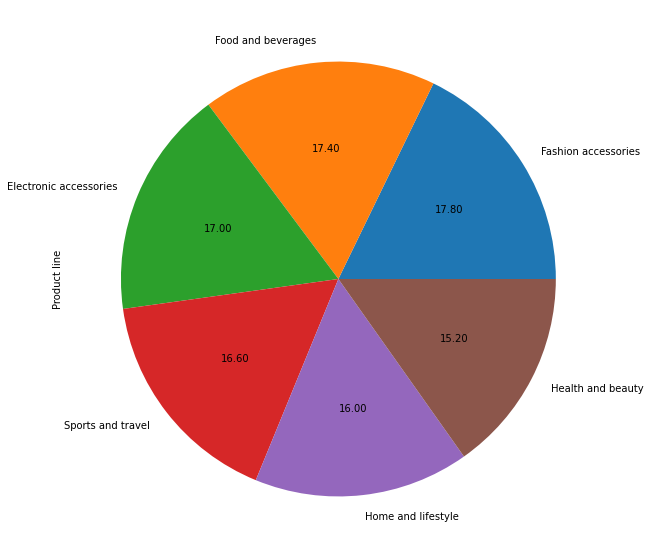

In [41]:
# Menampilkan proporsi product line menggunakan diagram pie
viz1 = df['Product line'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')
viz1

Proporsi jenis produk bisa dikatakan hampir seimbang. Proporsi paling besar ada di bidang fashion dan aksesoris.

In [18]:
# Menampilkan data rerata rating berdasarkan gender di setiap branch
r_gb = df.groupby(['Branch','Gender'])[['Gender', 'Rating']].mean()
r_gb

Rating
Branch Gender          
A      Female  6.839130
       Male    7.196089
B      Female  6.876543
       Male    6.762353
C      Female  7.157865
       Male    6.972000

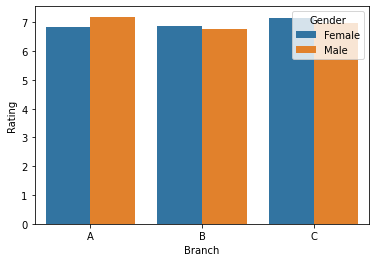

In [20]:
# Menampilkan grafik rerata rating berdasarkan gender di setiap branch
r_gbv = df[(df['Gender'] == 'Male') | (df['Gender'] == 'Female')].groupby(['Branch','Gender']).mean()['Rating'].reset_index()
viz2 = sns.barplot(x=r_gbv['Branch'],y=r_gbv['Rating'],orient='v',hue=r_gbv['Gender'])
viz2

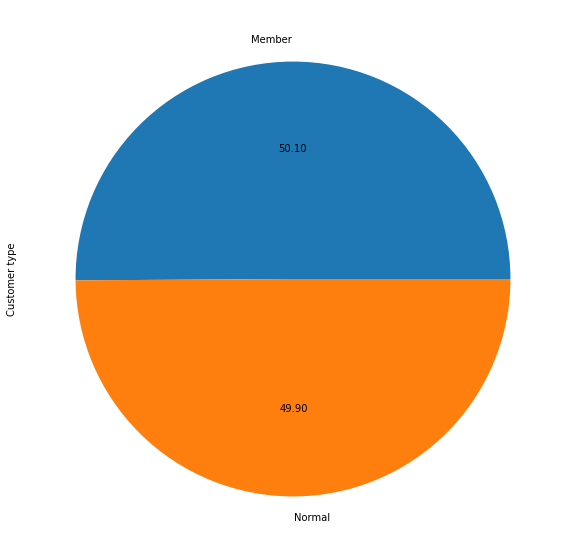

In [21]:
# Menampilkan proporsi jenis customer menggunakan diagram pie
viz3 = df['Customer type'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')
viz3

Proporsi pelanggan member dan non-member hampir seimbang.

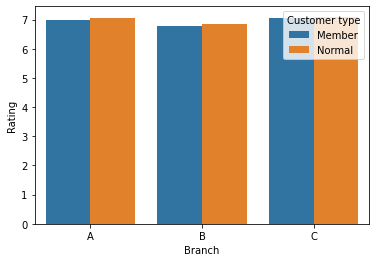

In [22]:
# Menampilkan data rerata rating berdasarkan jenis customer di setiap branch
r_mbv = df[(df['Customer type'] == 'Member') | (df['Customer type'] == 'Normal')].groupby(['Branch','Customer type']).mean()['Rating'].reset_index()
viz4 = sns.barplot(x=r_mbv['Branch'],y=r_mbv['Rating'],orient='v',hue=r_mbv['Customer type'])
viz4

rerata rating berdasarka membership hampir sama. Namun selanjutnya akan diuji apakah perbedaannya signifikan atau tidak.

## VI. Measures of Central Tendency

### 6.1. Mengambil data setiap jenis customer 

In [23]:
# Slicing jenis customer member
member = df[df['Customer type']=='Member']

In [24]:
# Slicing jenis customer non-member
non_member = df[df['Customer type']=='Normal']

### 6.2. Melihat central tendency dari setiap jenis customer

In [12]:
# descriptive statistics untuk melihat central tendency jenis customer member
member.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,501.0,6.940319,1.74938,4.0,5.4,7.0,8.5,10.0


In [13]:
# descriptive statistics untuk melihat central tendency jenis customer non-member
non_member.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,499.0,7.00521,1.688222,4.0,5.7,7.0,8.4,10.0


## VII. Measures of Variance

Saya ingin mengetahui sebaran data di sekitar nilai central tendency dengan melihat range, variansi, dan standart deviasi.

### 7.1. Menghitung Range Data

Range data adalah suatu nilai yang menggambarkan jangakauan/selisih nilai data terbesar dan terkecil.

In [25]:
# Menghitung range rating dari member customer dan non-member customer
print('Range Rating from Member Customer:',member['Rating'].max() - member['Rating'].min())
print('Range Rating from Non-Member Customer:',non_member['Rating'].max() - non_member['Rating'].min())

Range Rating from Member Customer: 6.0
Range Rating from Non-Member Customer: 6.0


### 7.2. Menghitung Variansi Data

Variansi data dapat menggambarkan sebearapa jauh titik data menyebar dari rerata. Apabila nilai variansi tinggi, maka titik-titik data tersebar luas. Sebaliknya apabila nilai variansi rendah, maka titik-titik data lebih dekat dengan rerata kumpulan data.

In [26]:
# Variansi data rating dari member customer dan non-member customer
print('Varian Rating from Member Customer:', member['Rating'].var())
print('Varian Rating from Non-Member Customer:', non_member['Rating'].var())

Varian Rating from Member Customer: 3.060331097804394
Varian Rating from Non-Member Customer: 2.850093278927331


### 7.3. Menghitung Standart Deviasi

Std merupakan indikator seberapa jauh data statistik menyimpang dan dapat memberi memberi gambaran kualitas data sampel yang diperoleh. Semakin besar nilai Std, maka semakin lebar rentang variasi datanya.

In [27]:
# Standart Deviasi data rating dari member customer dan non-member customer
print('Standart Deviasi Rating from Member Customer:', member['Rating'].std())
print('Standart Deviasi Rating from Non-Member Customer:', non_member['Rating'].std())

Standart Deviasi Rating from Member Customer: 1.7493802039020545
Standart Deviasi Rating from Non-Member Customer: 1.6882219282213258


Dari ketiga perhitungan variabilitas di atas, dapat disimpulkan bahwa data cukup terkumpul di sekitar mean

## VIII. Hypothesis Testing

Saya ingin mengetahui apakah perlu adanya peningkatan fasilitas untuk member customer agar menarik pelanggan non-customer untuk mendaftar member. Keputusan akan dilihat apakah perbedaan rerata rating member customer dan non-member customer signifikan atau tidak. Jika tidak signifikan, maka perlu adanya peningkatan fasilitas agar rating member customer meningkat dan menarik non-member customer untuk mendaftar member.

Metode hipotesis testing yang dilakukan adalah 2 sample 2 tailed.

### 8.1.Hypothesis Testing

mu1 = Mean Rating from Member Customer

mu2 = Mean Rating from Non-Member Customer

- H0 : mu1 = mu2
- H1 : mu1 != mu2

Rating of Member Customer:
- mean = 6.940319
- std = 1.74938	

Rating of Non-Member Customer:
- mean = 7.00521
- std = 1.688222	

In [28]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(member['Rating'], non_member['Rating'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.5507621727856713
t-statistics: -0.5968211265254104


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


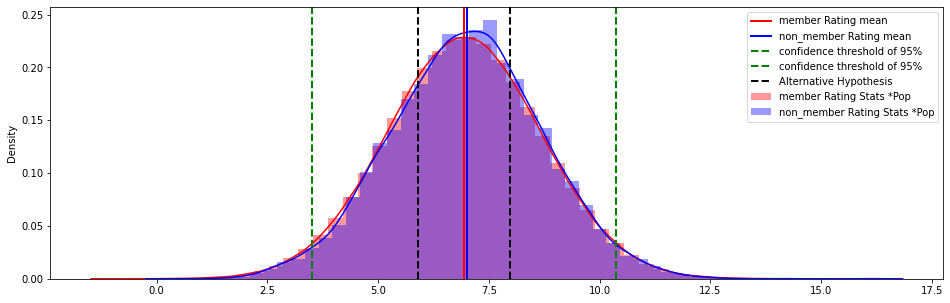

3.5115971663620837


In [30]:
# simulation
member_pop = np.random.normal(member['Rating'].mean(),member['Rating'].std(),1000000)
non_member_pop = np.random.normal(non_member['Rating'].mean(),non_member['Rating'].std(),10000)

# confidence interval based on failed
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, member['Rating'].mean(), member['Rating'].std())

plt.figure(figsize=(16,5))
sns.distplot(member_pop, label='member Rating Stats *Pop',color='red')
sns.distplot(non_member_pop, label='non_member Rating Stats *Pop',color='blue')

# mean
plt.axvline(member['Rating'].mean(), color='red', linewidth=2, label='member Rating mean')
plt.axvline(non_member['Rating'].mean(), color='blue',  linewidth=2, label='non_member Rating mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(member_pop.mean()+t_stat*member_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(member_pop.mean()-t_stat*member_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()
print(ci[0])

### 8.2. Kesimpulan Hypothesis Testing

**Kesimpulan grafik hasil uji hipotesis :**
1. Dari grafik tersebut, dapat dilihar bahwa distribusi normal rating member customer dan non-member customer memiliki variansi yang dekat dengan mean.
2. P-Value > α, artinya gagal menolak H0.
3. Perbedaan antara rerata rating dari member customer dan non-member customer tidak signifikan.

## IX. Pengambilan Kesimpulan

1. Rerata rating dari member customer memang lebih tinggi daripada non-customer member. Akan tetapi perbedaan tersebut tidak signifikan sehingga tidak cukup kuat untuk menarik non-member customer untuk mendaftar member.
2. Saran untuk tim marketing adalah melakukan peningkatan fasilitas dan penawaran menarik untuk member customer agar rating dari member customer dapat meningkat lagi dan menarik non-member customer untuk mendaftar member.